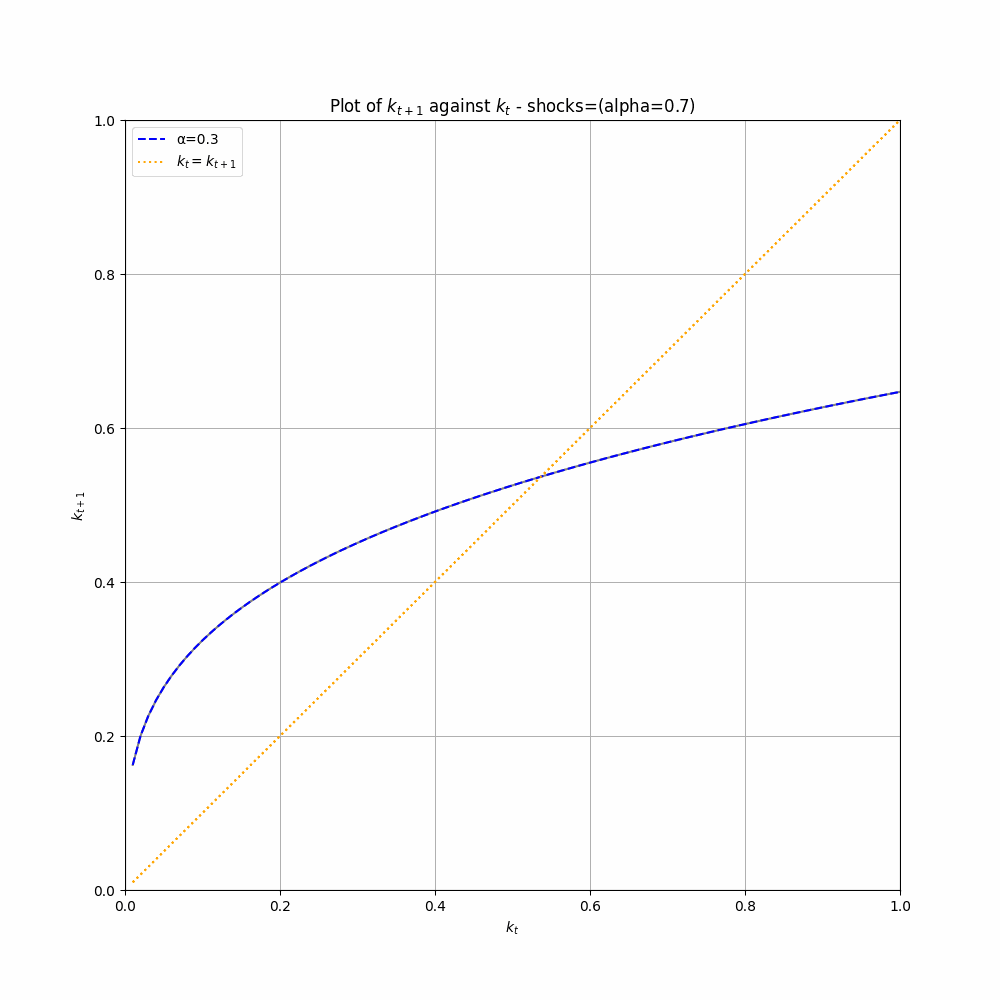

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

NUM_FRAMES = 25

def k_next(k_t, alpha, n, g, rho):
    return ((1-alpha)*k_t**alpha)/((1+n)*(1+g)*(1+rho))

def plot_phase(alpha=.03, n=.02, g=.02, rho=.04, color='blue', linestyle='-', legend=False, subtitle=''):
    k_vals = np.linspace(0.01, 1, 100)
    k_next_vals = [k_next(k, alpha, n, g, rho) for k in k_vals]

    plt.plot(k_vals, k_next_vals, label=f"α={alpha}" if legend else None, color=color, linestyle=linestyle)
    plt.plot(k_vals, k_vals, label="$k_t=k_{t+1}$" if legend else None, color='orange', linestyle='dotted')
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.title('Plot of $k_{t+1}$ against $k_t$ ' +  subtitle)
    plt.grid(True)
    plt.xlim(0,1)
    plt.ylim(0,1)
    if legend:
        plt.legend()

def animate(alpha, n, g, rho, shock={}, output_file='diamond.gif'):
    shock_str = ', '.join([f'{k}={v}' for k, v in shock.items()])
    def update(frame):
        shocked = {}
        if 'alpha' in shock:
            shocked['alpha'] = alpha + (shock['alpha'] - alpha) * frame / NUM_FRAMES
        else:
            shocked['alpha'] = alpha
        if 'n' in shock:
            shocked['n'] = n + (shock['n'] - n) * frame / NUM_FRAMES
        else:
            shocked['n'] = n
        if 'g' in shock:
            shocked['g'] = g + (shock['g'] - g) * frame / NUM_FRAMES
        else:
            shocked['g'] = g
        if 'rho' in shock:
            shocked['rho'] = rho + (shock['rho'] - rho) * frame / NUM_FRAMES
        else:
            shocked['rho'] = rho
        plt.clf()
        plot_phase(alpha, n, g, rho, color='gray')
        plot_phase(shocked['alpha'], shocked['n'], shocked['g'], shocked['rho'], linestyle='--', legend=True, subtitle=f'- shocks=({shock_str})')

    # Set up the initial plot
    fig, ax = plt.subplots(figsize=(10, 10))
    # plt.figure(figsize=(10, 10))
    # plt.subplot(5, 1, 1)

    # Set up the animation
    ani = FuncAnimation(fig, update, frames=range(NUM_FRAMES), repeat=True)

    # Saving the video
    ani.save(output_file, writer='pillow')
    plt.close(fig)


animate(alpha=.3,n=.02,g=.02,rho=.04, shock={'alpha': .7})
Image(filename='diamond.gif')


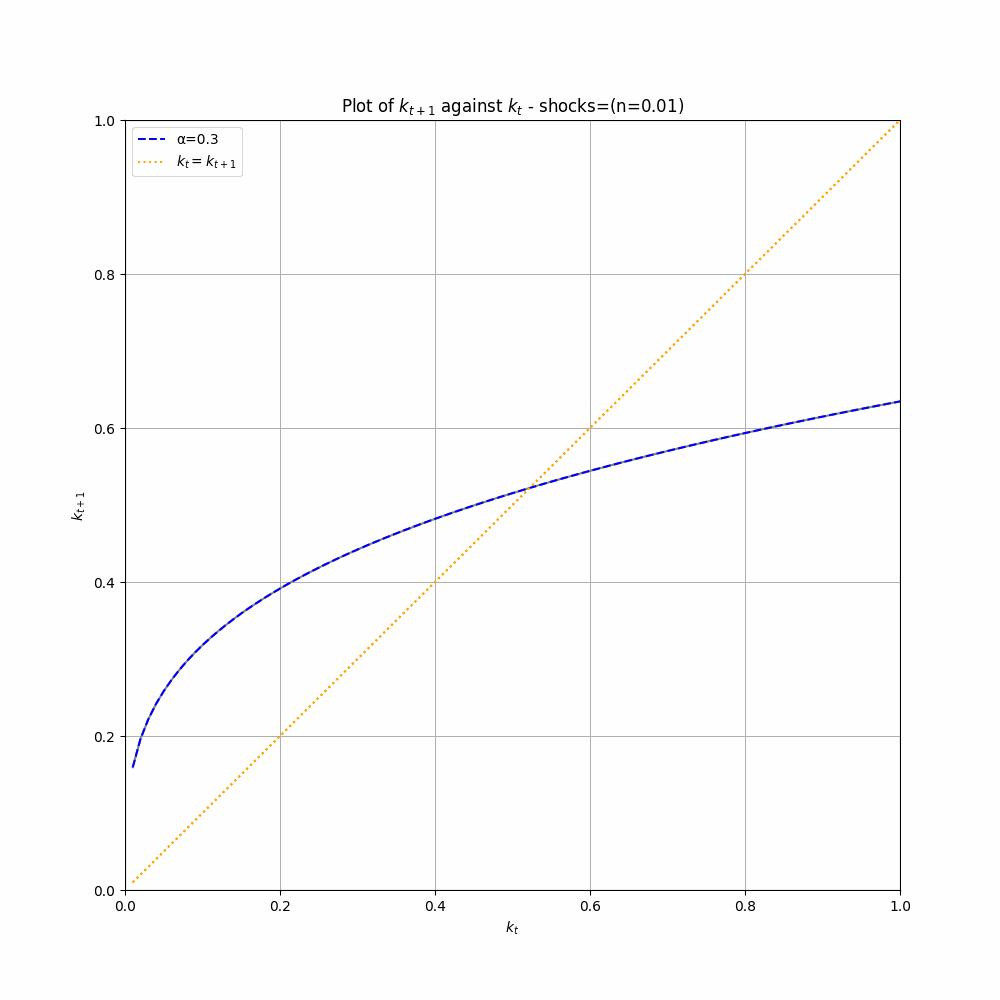

In [57]:
animate(alpha=.3,n=.04,g=.02,rho=.04, shock={'n': .01}, output_file='diamond_n.gif')
Image(filename='diamond_n.gif')

![](https://github.com/deodoro/macro_models/blob/main/diamond.gif?raw=true)
![](https://github.com/deodoro/macro_models/blob/main/diamond_n.gif?raw=true)

![](https://github.com/deodoro/macro_models/blob/main/diamond.gif?raw=true)